<h1 style = "color:red; border-bottom: 4px solid gold; 
           align: center;
           padding-bottom: 5px;">Project</h1>

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.area_type.value_counts()
    

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [10]:
df1 = df.drop(["area_type","society","balcony","availability"], axis =1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df1.dropna(inplace=True)

In [14]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df1.shape

(13246, 5)

In [17]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df1["bhk"] = df1["size"].apply(lambda x: int(x.split(" ")[0]))
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [32]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [33]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def not_float(x):
    try:
        float(x)
    except:
        return True
    #return False

In [31]:
denom =0
if denom !=0:
    print("result is ", 10/denom)
else:
    print("cannot divide by zero")

cannot divide by zero


In [36]:
df1["not_float_total_sqft"] =  df1["total_sqft"].apply(not_float)
df1.head()

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,False
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,False
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,False
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,False
4,Kothanur,2 BHK,1200,2.0,51.00,2,False


In [37]:
df1["not_float_total_sqft"].sum()

190

In [38]:
df1[df1["not_float_total_sqft"] ==True]

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,True
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,True
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,True
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,True
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,True
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2,True
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3,True
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2,True
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2,True


In [44]:
len("1200 - 300".split("-"))

2

In [50]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return(float(x))
    except:
        return None

In [52]:
convert_sqft_to_num("2166-12-12")

In [56]:
df2 =df1.copy()

df2["total_sqft"] = df2["total_sqft"].apply(convert_sqft_to_num) 
df2[df2.not_float_total_sqft ==True].head()

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4,True
122,Hebbal,4 BHK,5611.5,4.0,477.000,4,True
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2,True
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2,True
188,KR Puram,2 BHK,1277.5,2.0,56.800,2,True


In [57]:
df3 =df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,False
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,False
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,False
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,False
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,False


In [59]:
df3["price_per_sqft"] = df3["price"]*100000/df3["total_sqft"]
df3.head()

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,False,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,False,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,False,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,False,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,False,4250.000000


In [60]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
len(df3.location.unique()) ## A lot of categories

1304

In [ ]:
df3.location =df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats  

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [69]:
len(location_stats[location_stats<=10])

1052

<h1 style = "color:blue; border-bottom: 4px solid gold; 
           align: center;
           padding-bottom: 5px;">Dimensionality Reduction</h1>

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [70]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [71]:
"Kalkere" in location_stats_less_than_10

True

In [72]:
df3.location = df3.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)

In [74]:
df3.location.nunique()

242

In [76]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,False,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,False,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,False,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,False,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,False,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,False,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,False,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,False,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,False,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,False,36274.509804


In [77]:
### We will assume that a typical bedroom size is at least 300 square foot


df3[(df3.total_sqft/df3.bhk)<300]

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,False,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,False,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,False,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,False,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,False,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,False,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,False,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,False,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,False,9043.927649


In [79]:
df3.shape

(13246, 8)

In [90]:
df4 = df3[~((df3.total_sqft/df3.bhk)<300)]
df4.shape

(12502, 8)

In [91]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [96]:
df4[df4.location =='1st Block Jayanagar' ]
m = np.mean(df4.price_per_sqft)
std = np.std(df4.price_per_sqft)
print(m)
print(std)

6308.502826047989
4167.960021110165


In [99]:
def remove_pps_outlier(df):
    df_out= pd.DataFrame()
    for key,subdf in  df4.groupby(["location"]):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduced_df])
    return df_out

df5 = remove_pps_outlier(df4)
df5.shape



(10241, 8)

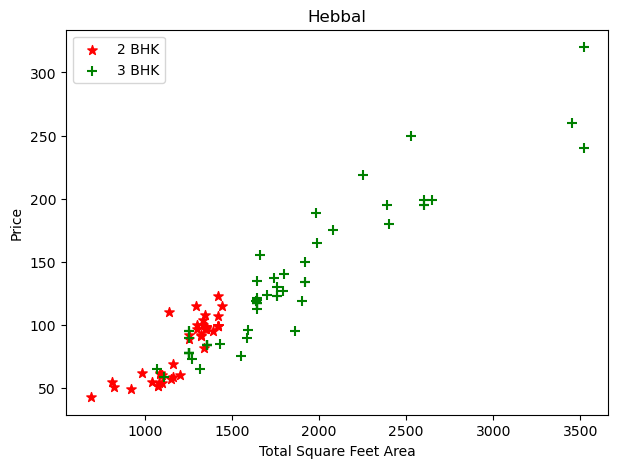

In [117]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location ==location) & (df.bhk==2) ]
    bhk3 = df[(df.location ==location) & (df.bhk==3) ]
    plt.figure(figsize=(7,5))
    plt.scatter(bhk2.total_sqft,bhk2.price,color="red", marker="*", label = "2 BHK" , s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="green", marker="+", label = "3 BHK",s=50 )
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()
    

plot_scatter_chart(df5,"Hebbal")


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [119]:
df5.head()

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,False,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,False,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,False,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,False,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,False,11983.805668


In [132]:
df5.groupby(["location","bhk"],as_index=False)["price"].mean()


sam =  df5[df5.location =="1st Block Jayanagar"] 
sam.head(10)

,location,size,total_sqft,bath,price,bhk,not_float_total_sqft,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,False,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,False,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,False,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,False,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,False,11983.805668
7383,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,False,15018.181818
10972,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,False,15020.408163


In [169]:
def remove_bhk_outlier(df):
    bhk_dic={}
    for key,subdf in df.groupby(["location","bhk"]):
        m = np.mean(subdf.price)
        sd = np.std(subdf.price)
        bhk_dic[key[1]] = {
            "mean": np.mean(subdf.price_per_sqft),
             "std": np.std(subdf.price_per_sqft),
              "count": subdf.shape[0]
        }
        #print(key[1])
        
       
        #print(display(subdf))
    for key,subdf in df.groupby(["location","bhk"]):
        stats = bhk_dic.get(key[1])
        print(f"print {stats}")
    return bhk_dic
 

remove_bhk_outlier(sam)

print {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
print {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
print {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}


{2: {'mean': 11983.805668016194, 'std': 0.0, 'count': 1},
 3: {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3},
 4: {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}}

In [183]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    bhk_stats = {}
    for location, location_df in df.groupby("location"):
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                bad_index = bhk_df[bhk_df.price_per_sqft<stats["mean"]].index
                exclude_indices = np.append(exclude_indices, bad_indices)


            
    return bhk_df.drop(exclude_indices,axis=0)

remove_bhk_outlier(sam)


,location,size,total_sqft,bath,price,bhk,not_float_total_sqft,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,False,15017.543860
7383,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,False,15018.181818
10972,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,False,15020.408163
